In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset = pd.read_csv('studentclusters.csv')

In [3]:
dataset.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


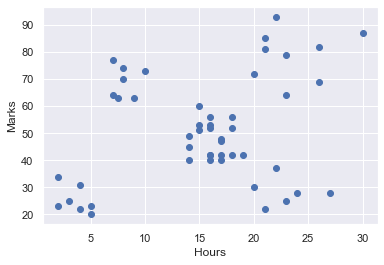

In [5]:
plt.scatter(dataset["shours"], dataset["marks"])
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()

In [6]:
#normalise any data when using euclidean distance

In [9]:
from sklearn.preprocessing import minmax_scale

In [19]:
data_scaled= minmax_scale(dataset)
type(data_scaled)

numpy.ndarray

In [11]:
from sklearn.cluster import KMeans

In [46]:
kmeans= KMeans(n_clusters=5, random_state=1234)
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=1234)

In [47]:
kmeans.cluster_centers_

array([[0.37808219, 0.50714286],
       [0.07436399, 0.05612245],
       [0.80974125, 0.76984127],
       [0.11415525, 0.74404762],
       [0.67318982, 0.21683673]])

In [48]:
labels= kmeans.labels_

In [49]:
lab= pd.DataFrame(labels, columns= ['label'])
lab.head()

,label
0,2
1,0
2,4
3,2
4,3


In [50]:
df= pd.concat([dataset, lab], axis=1)
df.head()

,marks,shours,label
0,72,20.0,2
1,42,19.0,0
2,77,7.0,4
3,93,22.0,2
4,30,20.0,3


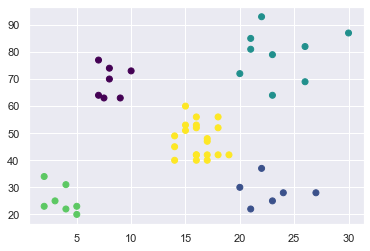

In [51]:
plt.scatter(df['shours'], df['marks'], c=df['label'], cmap='viridis_r')

In [52]:
#Inertia = sum of distances in a cluster
#rise in no. of clusters = decrease in interia
#elbow method for finding optimal number of clusters 

In [53]:
inertia= []
for i in range(2, 16):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

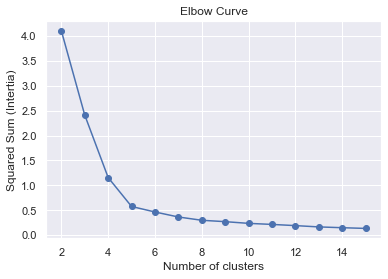

In [57]:
plt.figure()
plt.plot(range(2,16),inertia, marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Squared Sum (Intertia)")
plt.show()

In [59]:
#Optimum clustering for 5 clusters observed above!!